<a href="https://colab.research.google.com/github/MM21B038/High-Entropy-Alloy-Hardness-Prediction/blob/master/High_Entropy_Alloy_Hardness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Mo-Nb-Ta-W High Entropy Alloy Hardness Prediction

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data.xlsx')

In [3]:
df.head(5)

,Mo,Nb,Ta,W,sigma_T,x,y,reduced modulus,E_ROM,C11_ROM,C12_ROM,C44_ROM,shear_modulus_from_ROM,bulk_modulus_from_ROM,V_ROM,dV_ROM,HV_ROM,a_ROM,b_ROM,hardness
0,16.2,33.9,37.3,12.6,0.856579,-22.5,-40.5,107.54,210.057000,319.231400,151.456000,78.395000,81.094860,622.143400,17.659195,1.089679,1.453149,3.279638,2.840250,5.21
1,16.3,35.7,34.9,13.1,0.864383,-18.0,-40.5,108.01,209.867000,320.385100,151.206000,77.821000,81.134724,622.797100,17.645507,1.099951,1.474637,3.278777,2.839504,5.11
2,16.1,37.8,32.4,13.8,0.866180,-13.5,-40.5,113.82,209.431568,321.330370,150.963037,77.165834,81.075697,623.256444,17.635474,1.104662,1.499982,3.278149,2.838961,5.31
3,15.0,40.1,30.6,14.3,0.843410,-9.0,-40.5,113.59,207.144000,320.001000,150.522000,75.999000,80.250341,621.045000,17.650261,1.084048,1.516448,3.279092,2.839777,5.16
4,15.3,41.6,28.7,14.5,0.848367,-4.5,-40.5,118.49,206.787213,320.775325,150.217782,75.415584,80.195688,621.210889,17.638901,1.093896,1.529581,3.278375,2.839156,5.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mo                      311 non-null    float64
 1   Nb                      311 non-null    float64
 2   Ta                      311 non-null    float64
 3   W                       311 non-null    float64
 4   sigma_T                 311 non-null    float64
 5   x                       311 non-null    float64
 6   y                       311 non-null    float64
 7   reduced modulus         311 non-null    float64
 8   E_ROM                   311 non-null    float64
 9   C11_ROM                 311 non-null    float64
 10  C12_ROM                 311 non-null    float64
 11  C44_ROM                 311 non-null    float64
 12  shear_modulus_from_ROM  311 non-null    float64
 13  bulk_modulus_from_ROM   311 non-null    float64
 14  V_ROM                   311 non-null    fl

In [5]:
df.describe()

,Mo,Nb,Ta,W,sigma_T,x,y,reduced modulus,E_ROM,C11_ROM,C12_ROM,C44_ROM,shear_modulus_from_ROM,bulk_modulus_from_ROM,V_ROM,dV_ROM,HV_ROM,a_ROM,b_ROM,hardness
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,19.586495,36.501929,23.959164,19.953376,1.070883,-3.950161,1.012862,139.577235,229.337737,344.875162,154.539808,83.580456,89.172434,653.954779,17.418062,1.217163,1.675050,3.264436,2.827085,6.731447
std,5.142111,9.127435,7.423227,4.880274,0.169500,21.376500,23.770913,18.242299,18.370431,18.305545,3.591876,7.271472,7.213234,25.357898,0.169167,0.089683,0.131009,0.010686,0.009254,1.190694
min,9.800000,20.400000,12.500000,12.300000,0.703809,-45.000000,-40.500000,107.540000,190.904905,311.392192,146.572573,67.036000,74.363106,604.537337,17.048352,0.973772,1.434210,3.241080,2.806857,4.740000
25%,15.550000,28.850000,17.700000,16.000000,0.941291,-22.500000,-18.000000,125.255000,215.270000,329.281956,151.939000,78.331000,83.627293,633.842884,17.284759,1.154755,1.574368,3.255967,2.819750,5.770000
50%,19.000000,35.700000,22.600000,18.900000,1.077116,-4.500000,0.000000,134.340000,229.278000,343.285500,154.676677,83.891892,89.161130,652.489400,17.433177,1.236621,1.657227,3.265402,2.827921,6.530000
75%,23.350000,43.450000,29.300000,23.200000,1.214813,13.500000,22.500000,151.795000,243.578620,359.395612,157.262000,89.152069,94.873005,673.929486,17.559699,1.287176,1.768876,3.273371,2.834823,7.435000
max,31.300000,57.200000,42.000000,32.400000,1.373801,31.500000,45.000000,184.630000,267.214785,383.941359,161.964036,97.598402,104.182346,706.982318,17.725184,1.358824,1.983812,3.283860,2.843906,10.300000


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
result_selection = {
    'Model':[],
    'Score':[],
    'RMSE':[]
}

## Multiple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)
result_selection['Model'].append('Multiple Linear Regression')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

0.873903571371657
0.3682725709565417


## Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=1)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.8948537979699103
0.3362906367861297


In [15]:
result_selection['Model'].append('Ridge')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Polynomial Regression

In [16]:
from math import degrees
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly,y_train)
y_pred = regressor.predict(poly_reg.transform(x_test))

In [17]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.6144429161553926
0.6439650891638555


In [18]:
result_selection['Model'].append('Polynomial(degree = 2)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

In [19]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly,y_train)
y_pred = regressor.predict(poly_reg.transform(x_test))

In [20]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

-42.630714110480824
6.850371766284416


In [21]:
result_selection['Model'].append('Polynomial(degree = 3)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Support Vector Regression

In [22]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [23]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9052807070091968
0.31918112735040516


In [24]:
result_selection['Model'].append('Support Vector Regression')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [26]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9060263524844019
0.31792232254845404


In [27]:
result_selection['Model'].append('Support Vector Regression')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Random Forest Regression Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=15, random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [29]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9227372257456035
0.2882724436425871


In [30]:
result_selection['Model'].append('Random Forest (n = 15)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Artificial Neural Network

In [31]:
import tensorflow as tf

In [32]:
model = tf.keras.models.Sequential()

In [33]:
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))

In [34]:
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 4s 6ms/step - loss: 45.4115
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 34.3910
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 25.0374
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 17.9100
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 13.5253
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 10.9937
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 9.2995
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 8.0759
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 7.1898
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 6.3904
Epoch 11/100
25/25 [==============================] - 0s 7ms/step - loss: 5.6786
Epoch 12/100
25/25 [==============================] - 0s 8ms/step - loss: 4.9653
Epoch 13/100
25/25 [=========

In [37]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [38]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.8728946821009984
0.3697428981836202


In [39]:
result_selection['Model'].append('ANN')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## XGBoost Regression

In [40]:
from xgboost import XGBRegressor

In [41]:
regressor = model = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=15, random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [42]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.8931301909045145
0.3390357515563548


In [43]:
result_selection['Model'].append('XGBoost')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Comparing Models

In [44]:
model_analysis = pd.DataFrame(result_selection)
model_analysis

,Model,Score,RMSE
0,Multiple Linear Regression,0.873904,0.368273
1,Ridge,0.894854,0.336291
2,Polynomial(degree = 2),0.614443,0.643965
3,Polynomial(degree = 3),-42.630714,6.850372
4,Support Vector Regression,0.905281,0.319181
5,Support Vector Regression,0.906026,0.317922
6,Random Forest (n = 15),0.922737,0.288272
7,ANN,0.872895,0.369743
8,XGBoost,0.893130,0.339036


## Increasing Best Model Accuracy

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
regressor = RandomForestRegressor()
n = [i for i in range(5,51)]
params = {
    'n_estimators': n,
    'random_state' : [42]
}
grid = GridSearchCV(estimator=regressor, param_grid=params, cv=10)

In [47]:
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)

In [48]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9239111191090498
0.2860741253321577


In [49]:
para = grid.best_params_
print(para)

{'n_estimators': 26, 'random_state': 42}


In [50]:
result_selection['Model'].append('Random Forest (n = 26)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Compairing Models

In [51]:
model_analysis = pd.DataFrame(result_selection)

In [52]:
model_analysis

,Model,Score,RMSE
0,Multiple Linear Regression,0.873904,0.368273
1,Ridge,0.894854,0.336291
2,Polynomial(degree = 2),0.614443,0.643965
3,Polynomial(degree = 3),-42.630714,6.850372
4,Support Vector Regression,0.905281,0.319181
5,Support Vector Regression,0.906026,0.317922
6,Random Forest (n = 15),0.922737,0.288272
7,ANN,0.872895,0.369743
8,XGBoost,0.893130,0.339036
9,Random Forest (n = 26),0.923911,0.286074


In [53]:
model_analysis.to_excel('models_comparision.xlsx')

In [54]:
regressor = RandomForestRegressor(n_estimators=26, random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [55]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9239111191090498
0.2860741253321577


## Graphical Analysis Important Features vs Target

In [56]:
importances = regressor.feature_importances_

In [57]:
df = df.drop('hardness',axis=1)

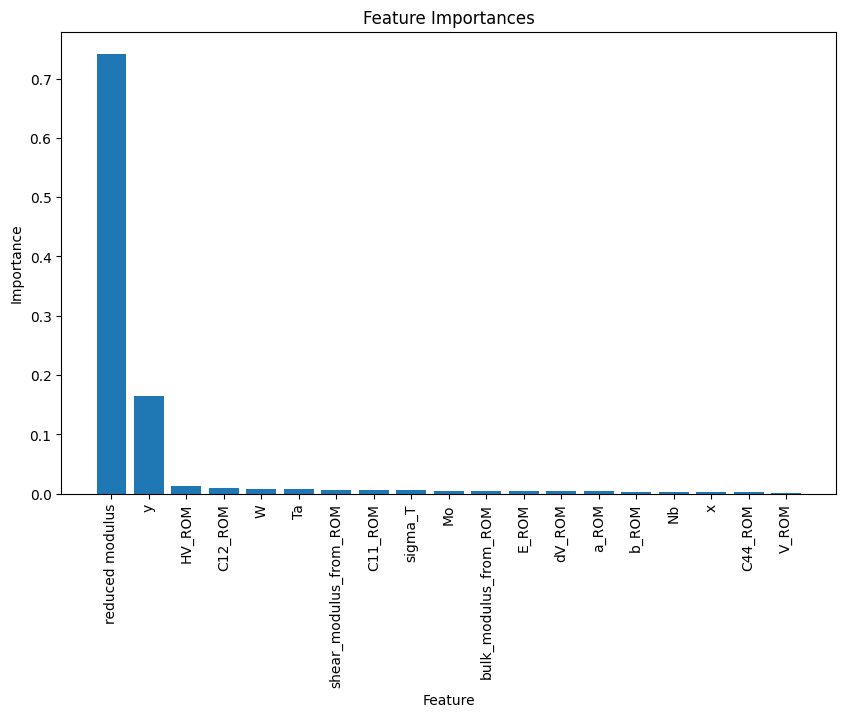

In [58]:
feature_names = np.array(df.columns)  # Replace with your actual feature names

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.savefig('feature_importance.png')
plt.show()

In [59]:
df = pd.read_excel('Data.xlsx')

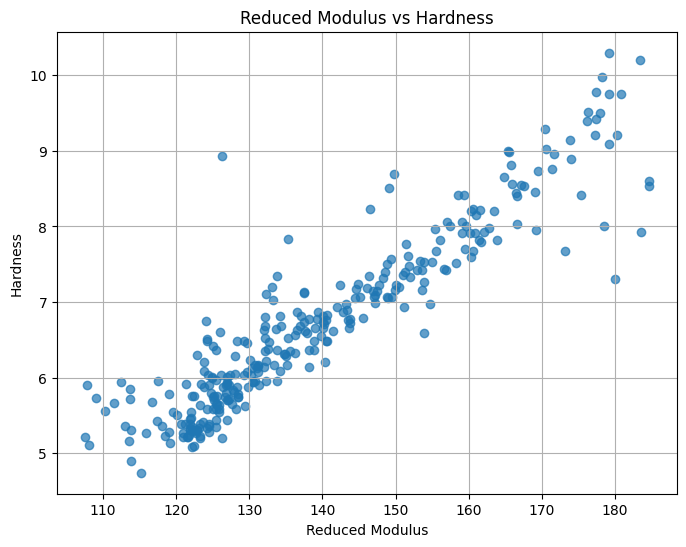

In [60]:
# 1. Reduced Modulus vs Hardness
plt.figure(figsize=(8, 6))
plt.scatter(df['reduced modulus'], df['hardness'], alpha=0.7)
plt.xlabel('Reduced Modulus')
plt.ylabel('Hardness')
plt.title('Reduced Modulus vs Hardness')
plt.grid(True)
plt.savefig('reduced_modulus_vs_hardness.png')
plt.show()

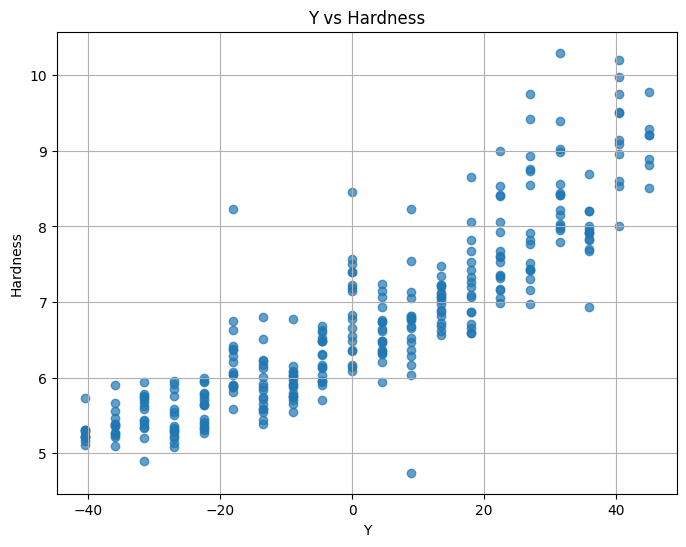

In [61]:
# 2. Y vs Hardness
plt.figure(figsize=(8, 6))
plt.scatter(df['y'], df['hardness'], alpha=0.7)
plt.xlabel('Y')
plt.ylabel('Hardness')
plt.title('Y vs Hardness')
plt.grid(True)
plt.savefig('y_vs_hardness.png')
plt.show()

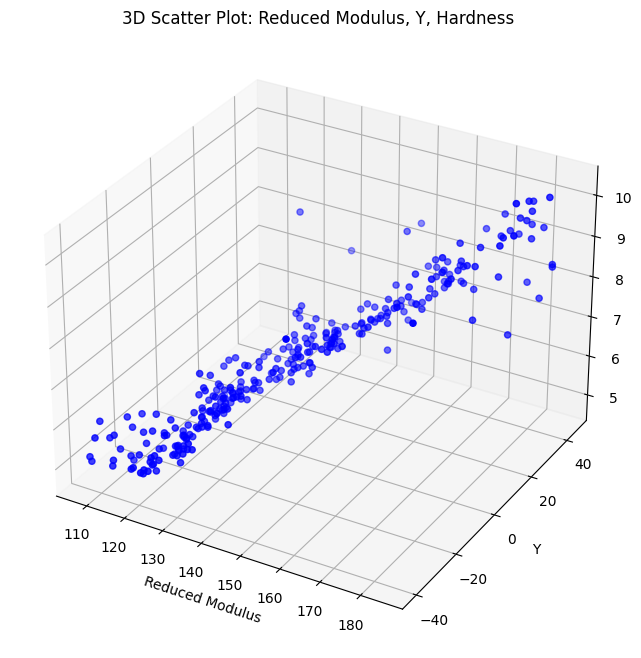

In [62]:
# 3. 3D graph with x-axis = reduced modulus, y-axis = Y, z-axis = hardness
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['reduced modulus'], df['y'], df['hardness'], c='blue', marker='o')
ax.set_xlabel('Reduced Modulus')
ax.set_ylabel('Y')
ax.set_zlabel('Hardness')
plt.title('3D Scatter Plot: Reduced Modulus, Y, Hardness')
plt.savefig('3d_scatter_plot_1.png')
plt.show()

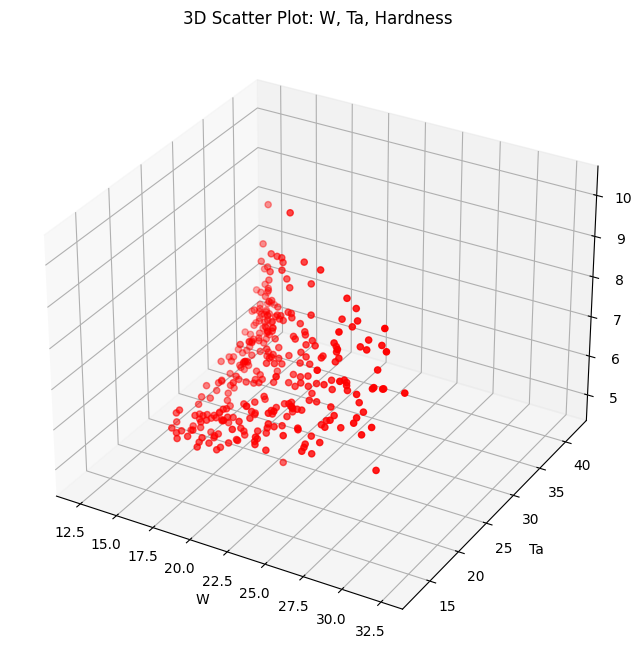

In [63]:
# 4. 3D graph with x-axis = W, y-axis = Ta, z-axis = hardness
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['W'], df['Ta'], df['hardness'], c='red', marker='o')
ax.set_xlabel('W')
ax.set_ylabel('Ta')
ax.set_zlabel('Hardness')
plt.title('3D Scatter Plot: W, Ta, Hardness')
plt.savefig('3d_scatter_plot_2.png')
plt.show()

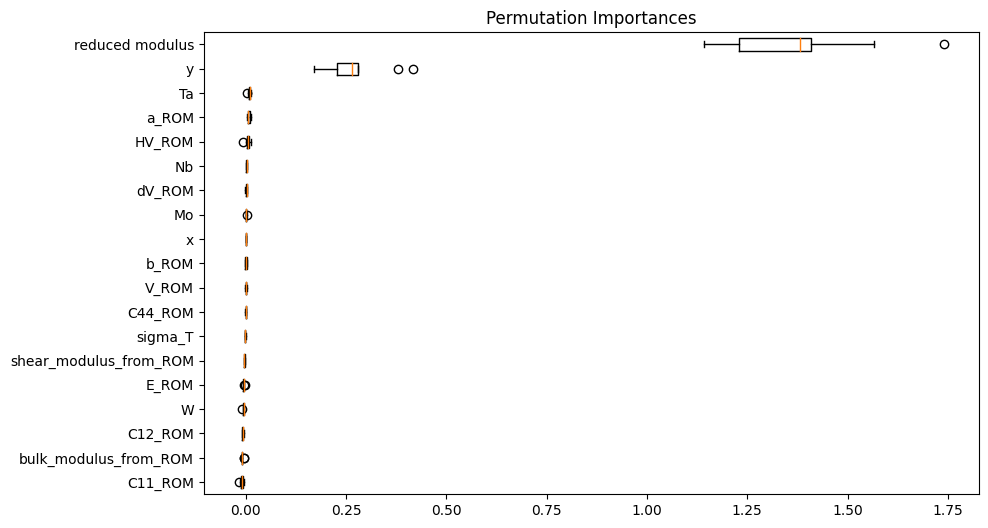

In [64]:
from sklearn.inspection import permutation_importance

result = permutation_importance(regressor, x_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=df.columns[sorted_idx])
plt.title("Permutation Importances")
plt.savefig('permutation_importances.png')
plt.show()

In [65]:
!pip install shap
import shap

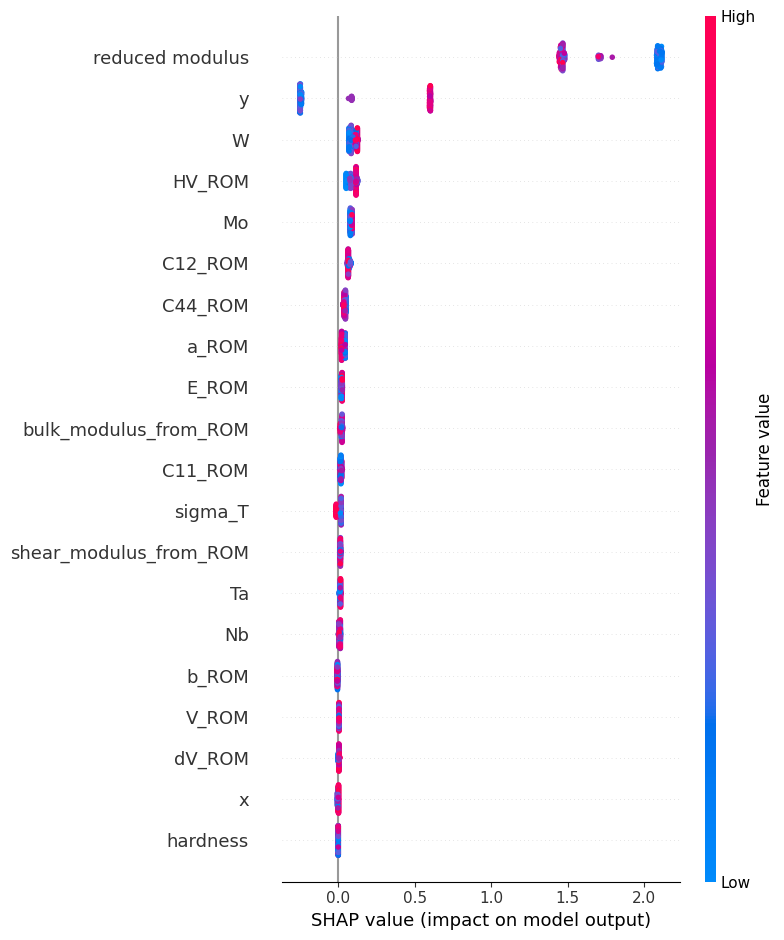

In [66]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values( df)
shap.summary_plot(shap_values, df)
plt.show()